## Imports

In [27]:
import pandas as pd
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression , Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report , f1_score
import seaborn as sns
import matplotlib.pyplot as plt

## Loading Data

In [28]:
DATASET_DIR = '../../Dataset/body_level_classification_train.csv'
df = pd.read_csv(DATASET_DIR)

## Data Preprocessing

In [29]:
df.head()

,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Alcohol_Consump,Smoking,Meal_Count,Food_Between_Meals,Fam_Hist,H_Cal_Burn,Phys_Act,Time_E_Dev,Transport,Body_Level
0,Female,22.547298,1.722461,51.881263,yes,2.663421,1.041110,no,no,3.000000,Frequently,yes,no,0.794402,1.391948,Public_Transportation,Body Level 1
1,Male,19.799054,1.743702,54.927529,yes,2.000000,2.847264,Sometimes,no,3.289260,Sometimes,yes,no,1.680844,2.000000,Public_Transportation,Body Level 1
2,Female,17.823438,1.708406,50.000000,yes,1.642241,1.099231,Sometimes,no,3.452590,Sometimes,no,no,0.418875,1.000000,Public_Transportation,Body Level 1
3,Female,19.007177,1.690727,49.895716,yes,1.212908,1.029703,Sometimes,no,3.207071,Sometimes,no,no,2.000000,1.000000,Public_Transportation,Body Level 1
4,Male,19.729250,1.793315,58.195150,yes,2.508835,2.076933,no,no,3.435905,Sometimes,yes,no,2.026668,1.443328,Automobile,Body Level 1


In [30]:

df['Gender'] = pd.factorize(df['Gender'])[0]
df['H_Cal_Consump'] = pd.factorize(df['H_Cal_Consump'])[0]
df['Alcohol_Consump'] = pd.factorize(df['Alcohol_Consump'])[0]
df['Smoking'] = pd.factorize(df['Smoking'])[0]
df['Food_Between_Meals'] = pd.factorize(df['Food_Between_Meals'])[0]
df['Fam_Hist'] = pd.factorize(df['Fam_Hist'])[0]
df['H_Cal_Burn'] = pd.factorize(df['H_Cal_Burn'])[0]
df['Transport'] = pd.factorize(df['Transport'])[0]
df['Body_Level'] = pd.factorize(df['Body_Level'])[0]


In [31]:
df.head()

,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Alcohol_Consump,Smoking,Meal_Count,Food_Between_Meals,Fam_Hist,H_Cal_Burn,Phys_Act,Time_E_Dev,Transport,Body_Level
0,0,22.547298,1.722461,51.881263,0,2.663421,1.041110,0,0,3.000000,0,0,0,0.794402,1.391948,0,0
1,1,19.799054,1.743702,54.927529,0,2.000000,2.847264,1,0,3.289260,1,0,0,1.680844,2.000000,0,0
2,0,17.823438,1.708406,50.000000,0,1.642241,1.099231,1,0,3.452590,1,1,0,0.418875,1.000000,0,0
3,0,19.007177,1.690727,49.895716,0,1.212908,1.029703,1,0,3.207071,1,1,0,2.000000,1.000000,0,0
4,1,19.729250,1.793315,58.195150,0,2.508835,2.076933,0,0,3.435905,1,0,0,2.026668,1.443328,1,0


## Feature Extraction

In [32]:
y = df['Body_Level']
X = df.drop(['Body_Level'], axis=1)
print(X.shape)
print(y.shape)

(1477, 16)
(1477,)


## Data Splitting

In [33]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(1181, 16)
(1181,)
(296, 16)
(296,)


## Solving Class Imbalance for Training Data

In [34]:
# solve class imbalance problem
df = pd.concat([x_train, y_train], axis=1)

print("Before OverSampling, counts of label '0': {}".format(sum(df['Body_Level'] == 0)))
print("Before OverSampling, counts of label '1': {}".format(sum(df['Body_Level'] == 1)))
print("Before OverSampling, counts of label '2': {}".format(sum(df['Body_Level'] == 2)))
print("Before OverSampling, counts of label '3': {} \n".format(sum(df['Body_Level'] == 3)))

df1 = df[df['Body_Level'] == 0]
df2 = df[df['Body_Level'] == 1]
df3 = df[df['Body_Level'] == 2]
df4 = df[df['Body_Level'] == 3]

print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)

max_size = df['Body_Level'].value_counts().max()

# make every one of df1,df2,df3,df4 equal to max_size
df1 = df1.sample(max_size, replace=True)
df2 = df2.sample(max_size, replace=True)
df3 = df3.sample(max_size, replace=True)
df4 = df4.sample(max_size, replace=True)

# concat all dataframes
df = pd.concat([df1, df2, df3, df4])

print("After OverSampling, counts of label '0': {}".format(sum(df['Body_Level'] == 0)))
print("After OverSampling, counts of label '1': {}".format(sum(df['Body_Level'] == 1)))
print("After OverSampling, counts of label '2': {}".format(sum(df['Body_Level'] == 2)))
print("After OverSampling, counts of label '3': {}".format(sum(df['Body_Level'] == 3)))


y_train = df['Body_Level']
x_train = df.drop(['Body_Level'], axis=1)

## Models Training and Evaluation

Accuracy Score of SVC(gamma='auto') is: 0.9054054054054054


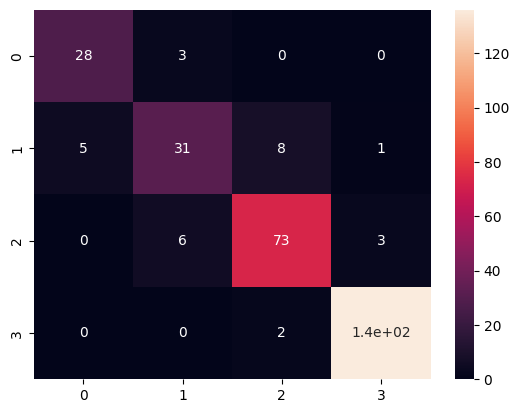

Classification Report of SVC(gamma='auto') is: 
              precision    recall  f1-score   support

           0       0.85      0.90      0.88        31
           1       0.78      0.69      0.73        45
           2       0.88      0.89      0.88        82
           3       0.97      0.99      0.98       138

    accuracy                           0.91       296
   macro avg       0.87      0.87      0.87       296
weighted avg       0.90      0.91      0.90       296

F1 Score of SVC(gamma='auto') is: 0.9038097564295722
------------------------------------------------------
Accuracy Score of LogisticRegression(solver='liblinear') is: 0.8209459459459459


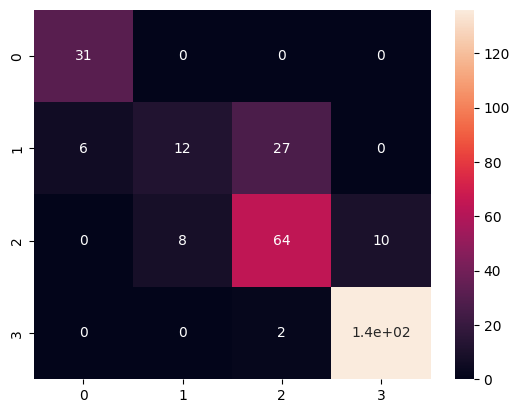

Classification Report of LogisticRegression(solver='liblinear') is: 
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        31
           1       0.60      0.27      0.37        45
           2       0.69      0.78      0.73        82
           3       0.93      0.99      0.96       138

    accuracy                           0.82       296
   macro avg       0.76      0.76      0.74       296
weighted avg       0.80      0.82      0.80       296

F1 Score of LogisticRegression(solver='liblinear') is: 0.8007643494573902
------------------------------------------------------
Accuracy Score of Perceptron() is: 0.3952702702702703


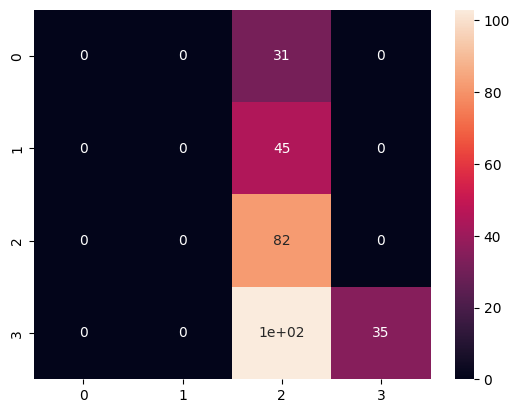

Classification Report of Perceptron() is: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.00      0.00      0.00        45
           2       0.31      1.00      0.48        82
           3       1.00      0.25      0.40       138

    accuracy                           0.40       296
   macro avg       0.33      0.31      0.22       296
weighted avg       0.55      0.40      0.32       296

F1 Score of Perceptron() is: 0.32109847085664
------------------------------------------------------


c:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
models = [SVC(kernel='rbf', gamma='auto'), LogisticRegression(solver='liblinear'), Perceptron(tol=1e-3, random_state=0)]
for model in models:
    # train the model
    model.fit(x_train, y_train)

    # predict the validation set
    y_pred = model.predict(x_test)

    # Accuracy Score
    print("Accuracy Score of " + str(model) + " is: " + str(accuracy_score(y_test, y_pred)))

    # Confusion Matrix
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True)
    plt.show()

    # Classification Report
    print("Classification Report of " + str(model) + " is: \n" + str(classification_report(y_test, y_pred)))

    # Weighted F1 Score
    print("F1 Score of " + str(model) + " is: " + str(f1_score(y_test, y_pred, average='weighted')))
    print("------------------------------------------------------")
    

